<h2>Data exploration - DataNexa</h2>
<h3>By Gilles, Asir & Arther</h3>


In this notebook we will explain which EDA techniques we think that are really intresting and important to do on every dataset.

<h3>1.3 EDA summary</h3>

<p>First we need to install all the libraries for the cleaning.<p>

In [2]:
%pip install pandas
%pip install matplotlib
%pip install numpy
%pip install scikit-learn
%pip install xlrd
%pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Develop

After everything is installed it is really important to check the current file with data and load it in a dataframe.

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

dataframe = pd.read_csv("../4. Other/4.1 Datasets/Datanexa/datanexa.csv") 
# For example if you use multiple sheets you can create more dataframes for a neat overview
# Or you can use pd.read_excel, html, etc... for other formats
# When you read excel the sheet_name variable will select which sheet it needs to read. 

# Lets print the first lines to check if it was loaded correctly
dataframe.head(5)

,number,answer,not_needed
0,230,yes,dhfhs
1,10,no,hfhqsjf
2,298,yes,hfdhhqs
3,39,no,hdfh
4,40,yes,ookd


A very intresting function is the statistics function. This will give us lots of information about the dataframe.

In [4]:
dataframe.describe()

,number
count,6.000000
mean,111.166667
std,121.059352
min,10.000000
25%,39.250000
50%,45.000000
75%,185.000000
max,298.000000


Also very important is that you need to drop the colums you won't use. This makes it easer later on when fitting the model.

In [5]:
dataframe.drop(['not_needed'], axis=1, inplace=True)

In [6]:
dataframe.head(5)

,number,answer
0,230,yes
1,10,no
2,298,yes
3,39,no
4,40,yes


We confirm the column is dropped correctly.

Next we will rename our column names. This is very important because this way we can give each column a clear name to prevent any conflicts later on.

In [7]:
dataframe.columns = ["Random_number","Yes_or_no"]

In [8]:
dataframe.head(5)

,Random_number,Yes_or_no
0,230,yes
1,10,no
2,298,yes
3,39,no
4,40,yes


In [9]:
print(dataframe.columns)

Index(['Random_number', 'Yes_or_no'], dtype='object')


We can also create a graph that displays the amount of yes and no's

([<matplotlib.patches.Wedge at 0x13879a760>,
 [Text(7.34788079488412e-17, 1.2000000000000002, 'Yes'),
  Text(-2.0206672185931328e-16, -1.1, 'No')],
 [Text(4.286263797015736e-17, 0.7, '50.0%'),
  Text(-1.1021821192326178e-16, -0.6, '50.0%')])

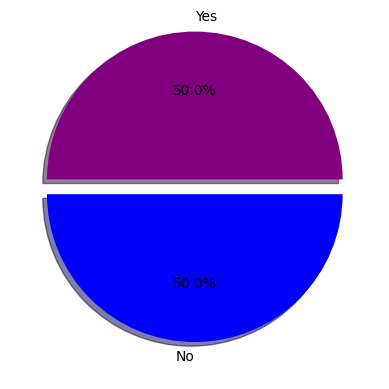

In [10]:
# piechart with matplotlib

yesnos = dataframe["Yes_or_no"]

Yes = []
No = []

for yes_no in yesnos:
    if yes_no == "yes":
        Yes.append(yes_no)
    else:
        No.append(yes_no)
labels = ["Yes","No"]
count_yes = np.array(len(Yes))
count_no = np.array(len(No))
plot_size = [count_yes,count_no]
explode = (0.1,0)
fig,ax = plt.subplots()
ax.pie(plot_size,labels=labels, explode = explode, autopct='%1.1f%%',colors=["purple","blue"],shadow=True)

Also a very intresting and important cleaning technique is encoding columns. This is really important when we have a classification problem because otherwise our model isn't able to predict. Let's encode the yes & no.

In [11]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder
encoder = LabelEncoder()

# Encode the categorical variable
df_encoded = encoder.fit_transform(dataframe['Yes_or_no'])

# Get the unique encodings
unique_encodings = set(df_encoded)

# Print the unique encodings and their corresponding labels
for encoding in unique_encodings:
    label = encoder.inverse_transform([encoding])
    print(f'{encoding}: {label}')

0: ['no']
1: ['yes']


In [12]:
dataframe['Yes_or_no'] = df_encoded

Now we have all the cleaned information in our dataframe. However we still need to save it to a new csv file so we can use it later in our model.

In [13]:
dataframe.to_csv('../4. Other/4.1 Datasets/Datanexa/datanexa_cleaned.csv')